In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
# df.head()

In [ ]:
# df.shape

In [ ]:
# print("Columns:", df.columns)

In [ ]:
# df.columns=df.columns.str.strip()

In [ ]:
# X=df.drop('Label',axis=1)
# X = X.replace([np.inf, -np.inf], np.nan)

# for column in X.columns:
#     if X[column].isnull().any():
#         X[column] = X[column].fillna(X[column].mean())


# y=df['Label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42

In [ ]:
# Begining of data preprocessing code added by Ahmad
df1 = pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")
df = pd.concat([df1, df2], axis=0)

df.columns = df.columns.str.strip() # Removes unnecessary white space from column names

label = {   # Labelling the target variable with numeric values
    'BENIGN': 0,
    'DDoS': 1,
    'DoS slowloris': 1,
    'DoS Slowhttptest': 1,
    'DoS Hulk': 1,
    'DoS GoldenEye': 1,
    'Heartbleed': 2
}

df['Label'] = df['Label'].map(label) # mapping the labels to their numeric values in df

df = df.dropna() # Removing rows that contain NaN values in df
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)] # Removing rows that contain inf values in df
df = df.loc[:, (df != 0).any(axis=0)] # Removing columns that only contain 0s in df
df.drop(df[df['Label'] == 2].index, inplace = True) # Removing the Heartbleed data (only 11 present)

def replace_port_numbers(x):
     return 1 if x == 80 else 0

df['Destination Port'] = df['Destination Port'].apply(replace_port_numbers)

X = df.drop(columns=['Label'])
y = df['Label']

correlations = abs(X.corrwith(pd.Series(y)))
correlations = correlations.sort_values(ascending=False)
X = X.drop(correlations.index[25:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# End of data preprocessing code added by Ahmad

In [ ]:
# Train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: ", accuracy)

Accuracy of Decision Tree Classifier:  0.9996837927424983


In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(4, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

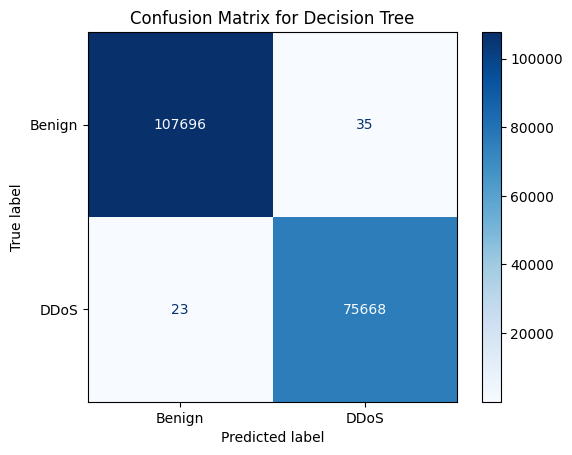

In [ ]:
#Beginning of Confusion Matrix: Yesha Modi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Filter predictions and true labels to include only Benign (0) and DDoS (1)
y_test_binary = y_test[y_test.isin([0, 1])]
y_pred_binary = y_pred[np.isin(y_test, [0, 1])].flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()
#Ending of Confusion Matrix: Yesha Modi

In [ ]:
# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    107731
           1       1.00      1.00      1.00     75691
           2       1.00      1.00      1.00         2

    accuracy                           1.00    183424
   macro avg       1.00      1.00      1.00    183424
weighted avg       1.00      1.00      1.00    183424

